In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [3]:
df_train=pd.read_csv('../input/bigmart-sales-data/Train.csv')
df_test=pd.read_csv('../input/bigmart-sales-data/Test.csv')

In [4]:
df_train.shape

(8523, 12)

In [5]:
df_test.shape

(5681, 11)

In [6]:
df=pd.concat([df_train,df_test])
# df.drop([''])

In [7]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [8]:
df.shape

(14204, 12)

In [9]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
df.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [11]:
df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.3+ MB


Step 1: Basic EDA

In [13]:
# Data cleaning
# 1.Imputation
# 2.Noisy Data(Outlier Analysis,Regression,Binning)


In [14]:


features_cat=[]
features_num=[]
for feature in df.columns:
    if df[feature].dtype=='object':
        features_cat.append(feature)
    else:
        features_num.append(feature)



In [15]:
print(features_cat)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [16]:
print(features_num)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [17]:
# can we do this using .apply?
for feature in df.columns:
    print(feature,'percentage missing values:',100*df[feature].isnull().sum()/df.shape[0])

Item_Identifier percentage missing values: 0.0
Item_Weight percentage missing values: 17.171219374823995
Item_Fat_Content percentage missing values: 0.0
Item_Visibility percentage missing values: 0.0
Item_Type percentage missing values: 0.0
Item_MRP percentage missing values: 0.0
Outlet_Identifier percentage missing values: 0.0
Outlet_Establishment_Year percentage missing values: 0.0
Outlet_Size percentage missing values: 28.273725711067303
Outlet_Location_Type percentage missing values: 0.0
Outlet_Type percentage missing values: 0.0


In [18]:
df[df['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
5668,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store
5670,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


Text(0.5, 1.0, 'Pearson Correlation Heatmap')

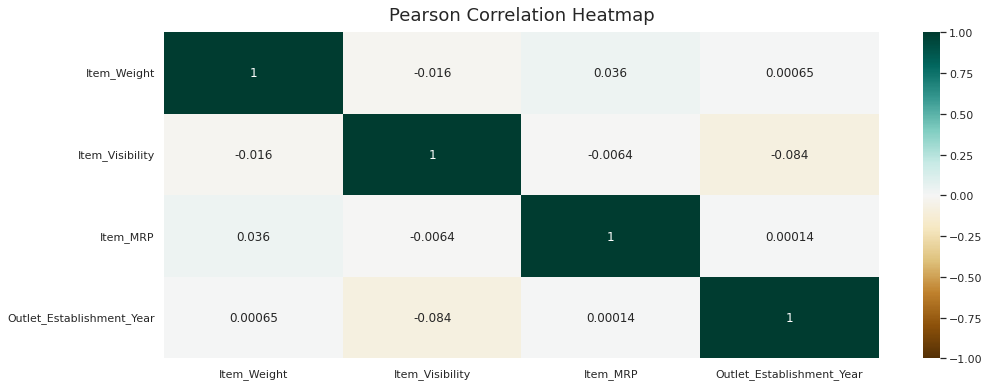

In [19]:
plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title('Pearson Correlation Heatmap',fontdict={'fontsize':18},pad=12)

## It is clear from heatmap that the features are mostly indpendent, therefore we should apply central tendency imputation on complete feature
## if there was a relation between features we could use regression imputation
https://medium.com/@Cambridge_Spark/tutorial-introduction-to-missing-data-imputation-4912b51c34eb

In [20]:
cat_ordinal=[]
cat_nominal=[]
for c in features_cat:
    if (df[c].nunique()) >10:
        cat_nominal.append(c)
    else:
        cat_ordinal.append(c)


In [21]:
cat_ordinal

['Item_Fat_Content',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [22]:
cat_nominal

['Item_Identifier', 'Item_Type']

In [23]:

num_discrete=[]
num_continuous=[]
for c in features_num:
    if (df[c].nunique()) >10:
        num_continuous.append(c)
    else:
        num_discrete.append(c)



In [24]:
print(num_continuous)

['Item_Weight', 'Item_Visibility', 'Item_MRP']


In [25]:
print(num_discrete)

['Outlet_Establishment_Year']


In [26]:
for feature in num_continuous:
    df[feature].fillna(df[feature].mean(),inplace=True)

In [27]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [28]:
df['Outlet_Size'].mode().values[0]

'Medium'

In [29]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode().values[0],inplace=True)

In [30]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [31]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [32]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
5676,10.50,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.60,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.30,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


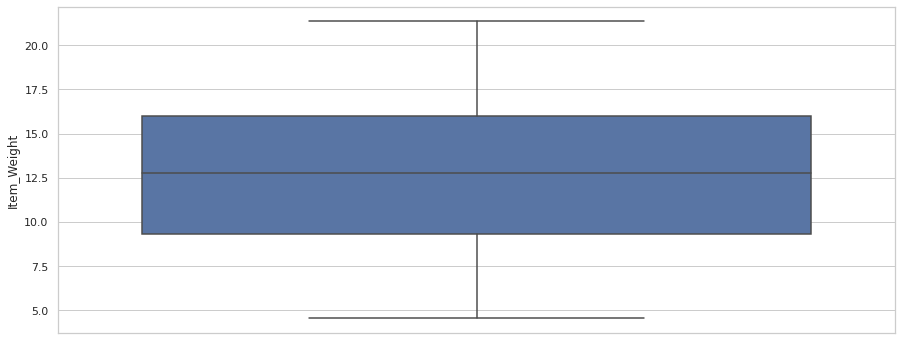

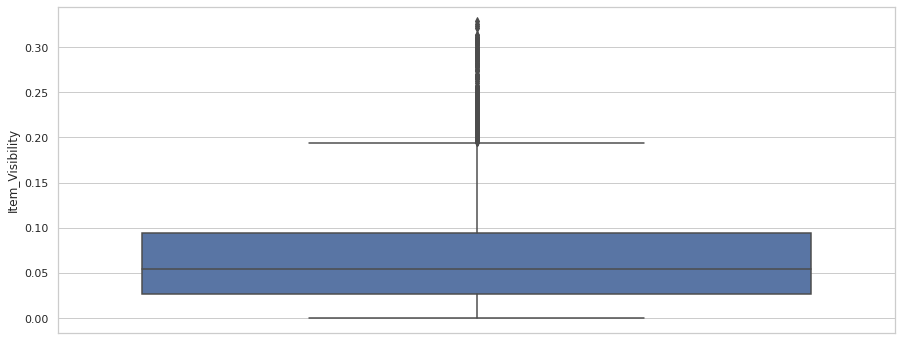

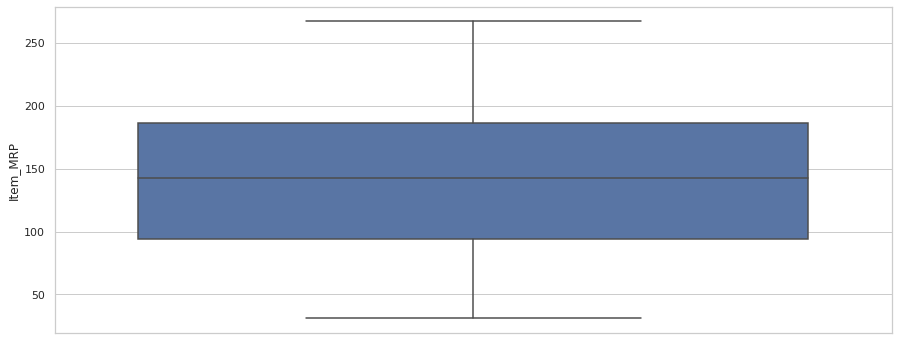

In [33]:
for c in num_continuous:
    plt.figure(figsize=(15,6))
    fig = sns.boxplot(y=c,data=df)
    fig.set_ylabel(c)



In [34]:
# Item_Visibilty has significant number of outliers, we will see if it requires outlier treatment after model evaluation

In [35]:
# from sklearn.preprocessing import OrdinalEncoder
# ordinalencoder=OrdinalEncoder()
# # if we pass the series it will generate an error
# df.Outlet_Size=ordinalencoder.fit_transform(df[['Outlet_Size']])
# df.Outlet_Size.nunique()

In [36]:
print(type(df[['Outlet_Size','Item_Weight']]))
print(type(df.Outlet_Size))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [37]:
# Data transformation
# Encoding and Scaling
from sklearn.preprocessing import OrdinalEncoder
oec=OrdinalEncoder()
cat_ordinal=list(set(cat_ordinal)-set(['Outlet_Identifier']))
df[cat_ordinal]=oec.fit_transform(df[cat_ordinal])
    

In [38]:
import datetime
curr_year=datetime.datetime.now().year
df['Age']=curr_year-df.Outlet_Establishment_Year

In [39]:
df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [40]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,9.30,1.0,0.016047,Dairy,249.8092,1.0,0.0,1.0,23
1,5.92,2.0,0.019278,Soft Drinks,48.2692,1.0,2.0,2.0,13
2,17.50,1.0,0.016760,Meat,141.6180,1.0,0.0,1.0,23
3,19.20,2.0,0.000000,Fruits and Vegetables,182.0950,1.0,2.0,0.0,24
4,8.93,1.0,0.000000,Household,53.8614,0.0,2.0,1.0,35
...,...,...,...,...,...,...,...,...,...
5676,10.50,2.0,0.013496,Snack Foods,141.3154,2.0,0.0,1.0,25
5677,7.60,2.0,0.142991,Starchy Foods,169.1448,1.0,2.0,2.0,13
5678,10.00,1.0,0.073529,Health and Hygiene,118.7440,1.0,1.0,1.0,20
5679,15.30,2.0,0.000000,Canned,214.6218,1.0,1.0,1.0,15


In [41]:
# now we need to encode nominal variables using either get dummies or OHE

In [42]:
df_ohe=pd.get_dummies(df.Item_Type,drop_first=True)
df_all=pd.concat([df,df_ohe],axis=1)


In [43]:
df_all.drop(['Item_Type'],axis=1,inplace=True)

In [44]:
df_all

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,1.0,0.016047,249.8092,1.0,0.0,1.0,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,5.92,2.0,0.019278,48.2692,1.0,2.0,2.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,17.50,1.0,0.016760,141.6180,1.0,0.0,1.0,23,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,19.20,2.0,0.000000,182.0950,1.0,2.0,0.0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,8.93,1.0,0.000000,53.8614,0.0,2.0,1.0,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,2.0,0.013496,141.3154,2.0,0.0,1.0,25,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5677,7.60,2.0,0.142991,169.1448,1.0,2.0,2.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5678,10.00,1.0,0.073529,118.7440,1.0,1.0,1.0,20,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5679,15.30,2.0,0.000000,214.6218,1.0,1.0,1.0,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# Now we will normalize our dataset

Text(0.5, 1.0, 'Distribution of MRP')

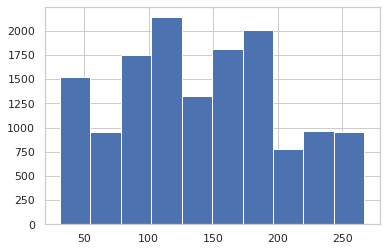

In [46]:
df.Item_MRP.hist()
fig.set_title('Distribution of MRP')

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['MRP_MMS']=scaler.fit_transform(df[['Item_MRP']])

In [48]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,MRP_MMS
0,9.30,1.0,0.016047,Dairy,249.8092,1.0,0.0,1.0,23,0.927507
1,5.92,2.0,0.019278,Soft Drinks,48.2692,1.0,2.0,2.0,13,0.072068
2,17.50,1.0,0.016760,Meat,141.6180,1.0,0.0,1.0,23,0.468288
3,19.20,2.0,0.000000,Fruits and Vegetables,182.0950,1.0,2.0,0.0,24,0.640093
4,8.93,1.0,0.000000,Household,53.8614,0.0,2.0,1.0,35,0.095805
...,...,...,...,...,...,...,...,...,...,...
5676,10.50,2.0,0.013496,Snack Foods,141.3154,2.0,0.0,1.0,25,0.467004
5677,7.60,2.0,0.142991,Starchy Foods,169.1448,1.0,2.0,2.0,13,0.585126
5678,10.00,1.0,0.073529,Health and Hygiene,118.7440,1.0,1.0,1.0,20,0.371199
5679,15.30,2.0,0.000000,Canned,214.6218,1.0,1.0,1.0,15,0.778154


<AxesSubplot:>

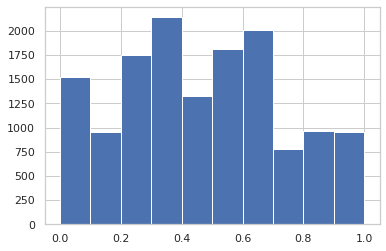

In [49]:
df.MRP_MMS.hist()

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['MRP_Std']=scaler.fit_transform(df[['Item_MRP']])

<AxesSubplot:>

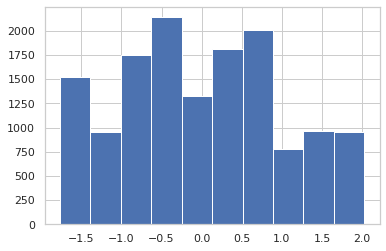

In [51]:
df.MRP_Std.hist()

In [52]:
df['MRP_LOG']=np.log(df.Item_MRP)

<AxesSubplot:>

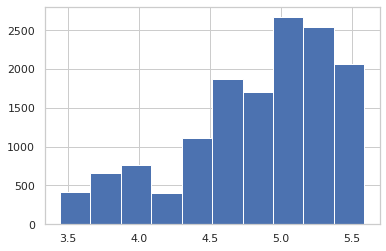

In [53]:
df.MRP_LOG.hist()

In [54]:
df['MRP_EXP']=(df.Item_MRP)**(1/1.2)

<AxesSubplot:>

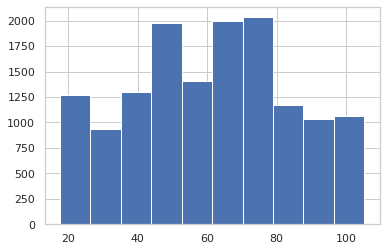

In [55]:
df.MRP_EXP.hist()

In [56]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Age',
       'MRP_MMS', 'MRP_Std', 'MRP_LOG', 'MRP_EXP'],
      dtype='object')

In [57]:
df_all.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Age', 'Breads',
       'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables',
       'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others',
       'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object')

In [58]:
df_all['MRP_MMS']=df.MRP_MMS

In [59]:
df_all.drop(['Item_MRP'],axis=1,inplace=True)

In [60]:
df_all

,Item_Weight,Item_Fat_Content,Item_Visibility,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,MRP_MMS
0,9.30,1.0,0.016047,1.0,0.0,1.0,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.927507
1,5.92,2.0,0.019278,1.0,2.0,2.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.072068
2,17.50,1.0,0.016760,1.0,0.0,1.0,23,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.468288
3,19.20,2.0,0.000000,1.0,2.0,0.0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.640093
4,8.93,1.0,0.000000,0.0,2.0,1.0,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.095805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,2.0,0.013496,2.0,0.0,1.0,25,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.467004
5677,7.60,2.0,0.142991,1.0,2.0,2.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.585126
5678,10.00,1.0,0.073529,1.0,1.0,1.0,20,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.371199
5679,15.30,2.0,0.000000,1.0,1.0,1.0,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.778154


<AxesSubplot:>

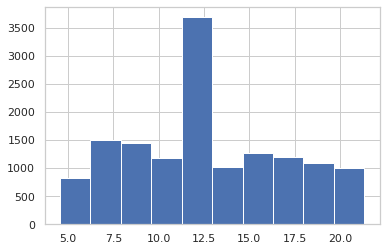

In [61]:
df.Item_Weight.hist()

In [62]:
mms_scaler=MinMaxScaler()
df_all['Item_Weight_MMS']=mms_scaler.fit_transform(df_all[['Item_Weight']])

<AxesSubplot:>

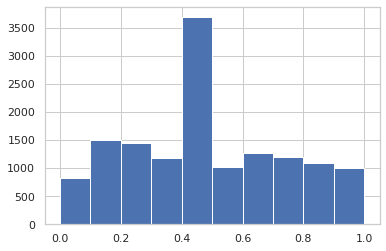

In [63]:
df_all.Item_Weight_MMS.hist()

In [64]:
df_all.drop(['Item_Weight'],axis=1,inplace=True)

In [65]:
df_all

,Item_Fat_Content,Item_Visibility,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,MRP_MMS,Item_Weight_MMS
0,1.0,0.016047,1.0,0.0,1.0,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.927507,0.282525
1,2.0,0.019278,1.0,2.0,2.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.072068,0.081274
2,1.0,0.016760,1.0,0.0,1.0,23,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.468288,0.770765
3,2.0,0.000000,1.0,2.0,0.0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.640093,0.871986
4,1.0,0.000000,0.0,2.0,1.0,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.095805,0.260494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,2.0,0.013496,2.0,0.0,1.0,25,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.467004,0.353974
5677,2.0,0.142991,1.0,2.0,2.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.585126,0.181304
5678,1.0,0.073529,1.0,1.0,1.0,20,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.371199,0.324204
5679,2.0,0.000000,1.0,1.0,1.0,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.778154,0.639774


In [66]:
train=df_all.iloc[0:8523,:]

In [67]:
train

,Item_Fat_Content,Item_Visibility,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,MRP_MMS,Item_Weight_MMS
0,1.0,0.016047,1.0,0.0,1.0,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.927507,0.282525
1,2.0,0.019278,1.0,2.0,2.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.072068,0.081274
2,1.0,0.016760,1.0,0.0,1.0,23,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.468288,0.770765
3,2.0,0.000000,1.0,2.0,0.0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.640093,0.871986
4,1.0,0.000000,0.0,2.0,1.0,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.095805,0.260494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.056783,0.0,2.0,1.0,35,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.777729,0.137541
8519,2.0,0.046982,1.0,1.0,1.0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.326263,0.227746
8520,1.0,0.035186,2.0,1.0,1.0,18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.228492,0.359929
8521,2.0,0.145221,1.0,2.0,2.0,13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.304939,0.158083


In [68]:
test=df_all.iloc[8523:14204,:]

In [69]:
test

,Item_Fat_Content,Item_Visibility,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,MRP_MMS,Item_Weight_MMS
0,1.0,0.007565,1.0,0.0,1.0,23,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.325012,0.964275
1,4.0,0.038428,1.0,1.0,1.0,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.237819,0.222983
2,1.0,0.099575,1.0,2.0,0.0,24,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.893316,0.598095
3,1.0,0.015388,1.0,1.0,1.0,15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.525233,0.164335
4,2.0,0.118599,1.0,2.0,3.0,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.861381,0.490494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,2.0,0.013496,2.0,0.0,1.0,25,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.467004,0.353974
5677,2.0,0.142991,1.0,2.0,2.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.585126,0.181304
5678,1.0,0.073529,1.0,1.0,1.0,20,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.371199,0.324204
5679,2.0,0.000000,1.0,1.0,1.0,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.778154,0.639774


In [70]:
y=df_train['Item_Outlet_Sales']

In [71]:
y.shape

(8523,)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(train,y)



In [73]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)
pred=lreg.predict(x_cv)
rmse=np.sqrt(np.mean((pred-y_cv)**2))
print('rmse:',rmse)
pred_test=lreg.predict(test)
pd.DataFrame({'predicted_sale':pred_test})

rmse: 1190.5532960723615


,predicted_sale
0,2084.750996
1,1442.149186
2,2010.856484
3,2421.022655
4,5042.481685
...,...
5676,2319.308786
5677,3098.550208
5678,1703.524157
5679,3453.686315


In [74]:
from sklearn.metrics import r2_score
r2_score(y_cv,pred)

0.5163369009966172

**If we use train_test split, the model can explain 50% of the variance in the test dataset**

In [75]:
# calculating coefficients

coeff = pd.DataFrame(train.columns)

coeff['Coefficient_Estimate'] = pd.Series(lreg.coef_)



<AxesSubplot:title={'center':'Modal Coefficients'}>

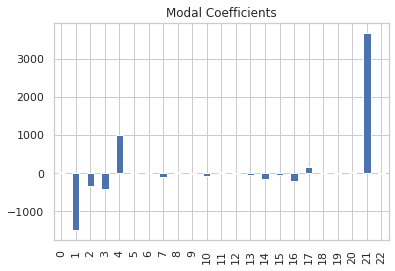

In [76]:
coeff.Coefficient_Estimate.plot(kind='bar',title='Modal Coefficients')

In [77]:
# To overcome overfitting we use feature reduction i.e PCA, feature selection and regularization
# we have different types of regression techniques which uses regularization to overcome this problem

In [78]:
# To implement Regualarization and K-fold 

In [79]:
# let's implement K-fold cross validation 

In [80]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lreg,x_cv,y_cv,cv=5,scoring='r2')



In [81]:
scores.mean()*100

51.41291717800923

**The model explains 49.68% of variance in the test dataset**

## Ridge Regression
* It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
* It reduces the model complexity by coefficient shrinkage, i.e. it implements L2 regularization

In [82]:
from sklearn.linear_model import Ridge
RidgeError=[]
for i in [0.5,0.05,10]:
    ridgeReg=Ridge(alpha=i)
    ridgeReg.fit(x_train,y_train)
    pred=ridgeReg.predict(x_cv)
    RidgeError.append(r2_score(y_cv,pred))
RidgeError    


[0.5163513215993591, 0.5163385535655542, 0.516171275465811]

**It is clear that our model performs best with alpha as 0.5**

In [83]:
from sklearn.linear_model import Lasso
# normalize=True, has been deprecated

lassoReg = Lasso(alpha=0.003)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

# calculating mse

# mse = np.mean((pred - y_cv)**2)

# print('mse: ',mse)

# print(lassoReg.score(x_cv,y_cv))
r2_score(y_cv,pred)



0.5163396938545497

**The model has a descent r2 score at alpha 0.003**
* It uses L1 regularization technique
* It is generally used when we have more number of features, because it automatically does feature selection.

In [84]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=0.001, l1_ratio=0.007)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_cv)

#calculating r2_score

r2_score(y_cv,pred)



0.5163396938545497